In [104]:
import numpy as np
import pandas as pd

In [105]:
from sklearn.datasets import load_breast_cancer
df=load_breast_cancer()

In [106]:
df1=pd.DataFrame(np.c_[df.data,df.target],columns=[list(df.feature_names)+['target']])

In [107]:
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [108]:
df1.target.head()

,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [109]:
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [110]:
x=df1.iloc[:,0:-1].values
y=df1.iloc[:,-1].values

In [111]:
print("shape of x:",x.shape)
print("shape of y:",y.shape)

shape of x: (569, 30)
shape of y: (569,)


In [112]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.30,random_state=50)

In [113]:
# from sklearn.preprocessing import StandardScaler
# std=StandardScaler()
# std.fit(x_train)
# x_train=std.transform(x_train)
# x_test=std.transform(x_test)

In [114]:
#Gasuaain
from sklearn.naive_bayes import GaussianNB
cg=GaussianNB()
cg.fit(x_train,y_train)

,priors,None
,var_smoothing,1e-09


In [115]:
y_pred=cg.predict(x_test)

In [116]:
cg.score(x_test,y_test)

0.9346733668341709

In [117]:
from sklearn.naive_bayes import MultinomialNB
mn=MultinomialNB()
mn.fit(x_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [118]:
mn.score(x_test,y_test)


0.8969849246231156

In [119]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
y_pred=mn.predict(x_test)

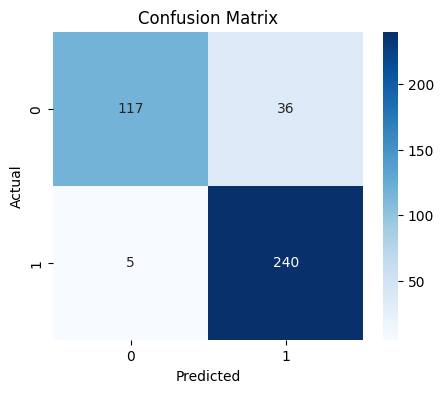

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [123]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(y_test,y_pred)
acc

0.8969849246231156

In [125]:
pr=precision_score(y_test,y_pred)
pr

0.8695652173913043

In [126]:
rv=recall_score(y_test,y_pred)
rv

0.9795918367346939

In [127]:
f1=f1_score(y_test,y_pred)
f1

0.9213051823416507